In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
ascii_chars = [chr(i) for i in range(32, 127)]
height, width = 10, 10

In [2]:
def create_image(char):
    # Create a blank image
    image = Image.new('L', (height, width), color=255)  # 'L' mode for grayscale
    draw = ImageDraw.Draw(image)
    
    # Draw the character
    draw.text((0, 0), char, fill=0)
    
    # Apply transformations for data synthesis
    # Example: Add Gaussian blur with random kernel size
    blur_radius = random.uniform(0, 0.75)  # Random blur radius between 0.5 and 2.0
    image = image.filter(ImageFilter.GaussianBlur(blur_radius))
    
    # Example: Add random rotation
    # rotation_angle = random.randint(-10, 10)  # Random rotation angle between -10 and 10 degrees
    # image = image.rotate(rotation_angle)
    
    # Example: Add random noise
    noise_intensity = random.uniform(0, 0.25)  # Random noise intensity between 0.1 and 0.5
    noise = np.random.normal(scale=noise_intensity, size=image.size)
    image = Image.fromarray(np.array(image) + noise.astype(np.uint8))
    image = ImageOps.invert(image)
    
    # Apply shift of the entire image
    shift_x = random.randint(-3,0)  # Random horizontal shift between -2 and 2 pixels
    shift_y = random.randint(-1, 3)  # Random vertical shift between -2 and 2 pixels
    image = image.transform(image.size, Image.AFFINE, (1, 0, shift_x, 0, 1, shift_y))
    

    return np.array(image)

In [3]:
data = []
labels = []

for i in range(450000):
    random_number = random.randint(33, 127)
    char = chr(random_number)
    image = create_image(char)
    data.append(image)
    labels.append(int(ord(char))-32)  # Use ASCII value as label
for i in range(50000):
    char = chr(32)
    image = create_image(char)
    data.append(image)
    labels.append(int(ord(char))-32)  # Use ASCII value as label


data = np.array(data)
labels = np.array(labels)

# Normalize data
data = data / 255.0

# Reshape data to fit model input requirements
data = data.reshape((len(data), height, width, 1))  # (num_samples, height, width, channels)

In [4]:
mean = np.mean(data)
std_dev = np.std(data)
minimum = np.min(data)
maximum = np.max(data)
data_type = data.dtype

print("Summary Statistics:")
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum Value:", minimum)
print("Maximum Value:", maximum)
print("Type:", data_type)

Summary Statistics:
Mean: 0.15242813717647063
Standard Deviation: 0.32082496831489454
Minimum Value: 0.0
Maximum Value: 1.0
Type: float64


(500000, 10, 10, 1)
|


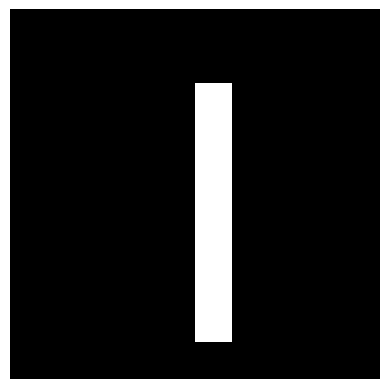

In [5]:
print(data.shape)
index = random.randint(0,99)
index = 25
image = data[index]  # Convert back to 0-255 range
print(chr(labels[index]+32))
plt.imshow(data[index][:, :, 0], cmap='gray')  # Assuming the first image is at index 0
plt.axis('off')  # Hide axis
plt.show()

In [6]:
flattened_images = data.reshape(data.shape[0], -1)

reshaped_data = np.concatenate((labels.reshape(-1, 1).astype(np.int8), flattened_images.astype(np.float64)), axis=1)

# Define column names
pixel_column_names = ['pixel{}'.format(i) for i in range(1, reshaped_data.shape[1])]
column_names = ["label"] + pixel_column_names

# Convert reshaped_data to a DataFrame with specified column names and dtypes
df = pd.DataFrame(reshaped_data, columns=column_names)

# Convert label column to int8 dtype
df['label'] = df['label'].astype(np.int8)

# Convert pixel columns to float64 dtype
for col in pixel_column_names:
    df[col] = df[col].astype(np.float64)

df = df.reset_index(drop=True)

# Save DataFrame to CSV without index
df.to_csv(f'ascii_character_classification_{height}_x_{width}.csv', index=False)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100
0,64,0.011765,0.082353,0.082353,0.011765,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,76,0.000000,0.000000,0.000000,0.952941,0.952941,0.976471,0.952941,0.023529,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,59,0.000000,0.149020,0.701961,0.796078,0.592157,0.113725,0.011765,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.211765,0.203922,0.168627,0.090196,0.168627,0.156863,0.035294,0.0
4,51,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.850980,0.764706,0.764706,0.760784,0.207843,0.019608,0.000000,0.0


1
[0.         0.         0.         0.95294118 0.95294118 0.97647059
 0.95294118 0.02352941 0.         0.         0.         0.
 0.         0.02352941 0.04705882 0.97647059 0.97647059 0.02352941
 0.         0.         0.         0.         0.         0.
 0.02352941 0.97647059 0.97647059 0.02352941 0.         0.
 0.         0.         0.         0.         0.02352941 0.97647059
 0.97647059 0.02352941 0.         0.         0.         0.
 0.         0.         0.02352941 0.97647059 0.97647059 0.02352941
 0.         0.         0.         0.         0.         0.02352941
 0.04705882 0.97647059 0.97647059 0.04705882 0.02352941 0.
 0.         0.         0.         0.95294118 0.95294118 0.97647059
 0.97647059 0.95294118 0.92941176 0.02352941 0.         0.
 0.         0.02352941 0.02352941 0.02352941 0.02352941 0.02352941
 0.02352941 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

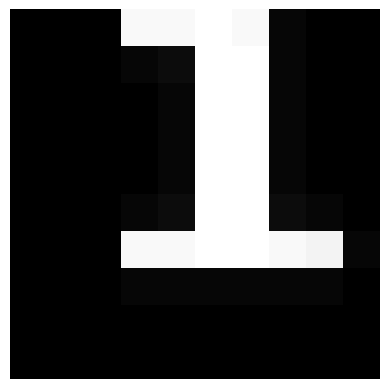

In [7]:
df = pd.read_csv(f'ascii_character_classification_{height}_x_{width}.csv')
index = (df.iloc[:, 0] != 0).idxmax()
index += 1
print(index)
# Extract the pixel values of the first record as a NumPy array
first_record_pixels = df.iloc[index, 1:].values
print(first_record_pixels)
# Reshape the pixel values to a 10x10 image
image = first_record_pixels.reshape(height, width, 1)
print(int(df.iloc[index, 0])+32)
print("label: ", chr(int(df.iloc[index, 0])+32))
# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  
plt.show()